# GRIP : The Sparks Foundation Data Science And Business Analytics Internship

# Creator : Aaryan Kaushal

# Task 3 : Perform Exploratory Data Analysis on the Datatset Sample SuperStore

### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### The following settings will improve the default style and font sizes for our charts.

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [4]:
# Importing the dataset
df=pd.read_csv('SampleSuperstore.csv')

In [5]:
#Taking a look at our dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#Check for null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Hence we can see that there are no null values present in our dataset.

In [7]:
#Getting a basic information of the columns in our dataset like the non-null values count and their datatypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#Check for the distinct categories/values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [9]:
#All the columns in our dataset
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [10]:
#sSize of our dataset
df.shape

(9994, 13)

In [11]:
#The Categorical columns of our dataset
cat_col= ['Ship Mode', 'Segment', 'Country',  'State',
       'Region', 'Category', 'Sub-Category','Quantity', 'Discount']

In [12]:
# Taking a look at the distinct categories of the categorical columns
for i in cat_col:
    print(df[i].unique())


['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
['South' 'West' 'Central' 'East']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
[ 2  3  5  7  4  6  9  1  8 14 11 1

In [13]:
#Stastitical infomation like the mean, 25th percentile,50 percentile,....of the numerical columns
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [14]:
#General information like the most frequently occuring category and their frequency of the categorical columns of our dataset
df.describe(include=['O'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [15]:
#Now we will drop the Postal code column as it seems to be of no use to us
new_df=df.drop(columns='Postal Code',axis=1)

In [16]:
new_df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [17]:
#Correaltion between the Numerical columns 
new_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


## Visualization

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

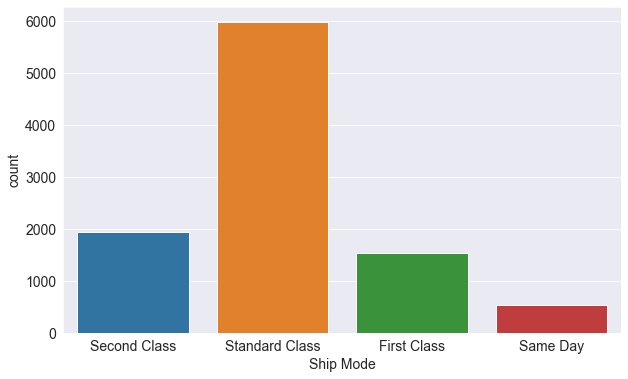

In [18]:
sns.countplot(x=df['Ship Mode'])

Hence the Stardard class is the most preferred shipping mode among all with approximately 6000 out of 9994.

<AxesSubplot:xlabel='Segment', ylabel='count'>

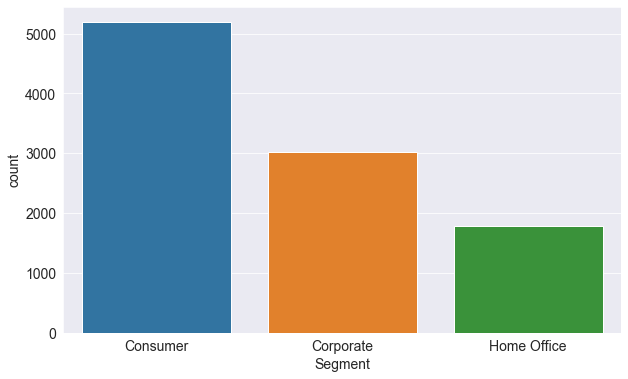

In [19]:
sns.countplot(x=df['Segment'])

The Consumer segment is the most occuring category followed by corporate and home office.


<AxesSubplot:>

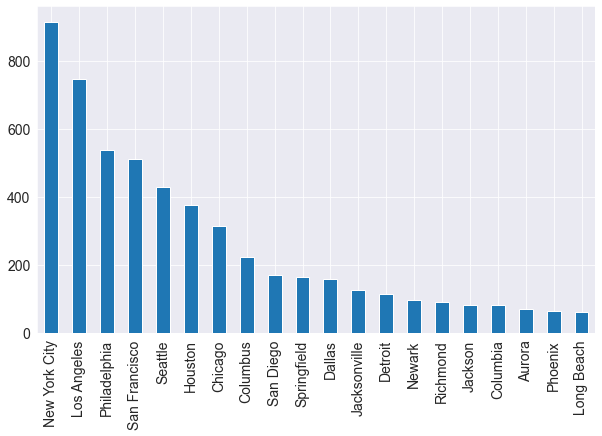

In [20]:
df['City'].value_counts().nlargest(20).plot(kind = 'bar')

New York City has the highest amount of orders/customers followed by Los Angeles, Philadelphia,San Francisco,Seattle,Houston and Chichago. The other cities have a relatively low demand of orders.

<AxesSubplot:xlabel='Region', ylabel='count'>

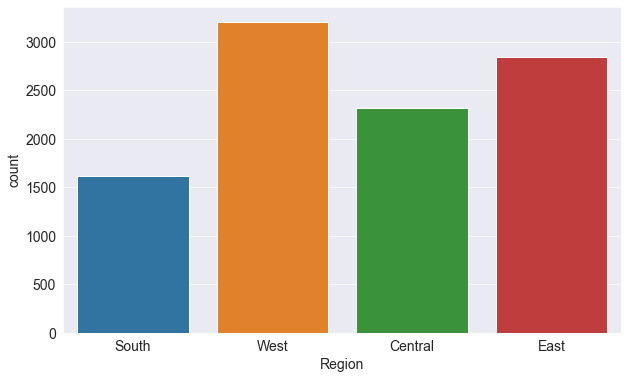

In [21]:
sns.countplot(x=df['Region'])

We can clearly see that the western region has the highest demand followed by eastern and the central region.The southern has a comparatively less demand of orders.

<AxesSubplot:xlabel='Category', ylabel='count'>

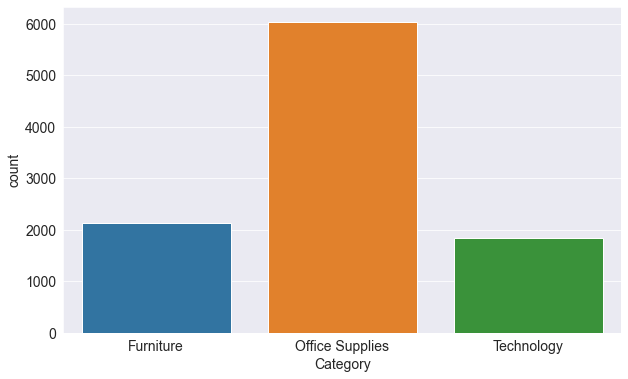

In [22]:
sns.countplot(x=df['Category'])

Office Supplies Category has the highest demand among the 3 categories with the other two categories with a relatively lower demand.

<AxesSubplot:xlabel='Category', ylabel='count'>

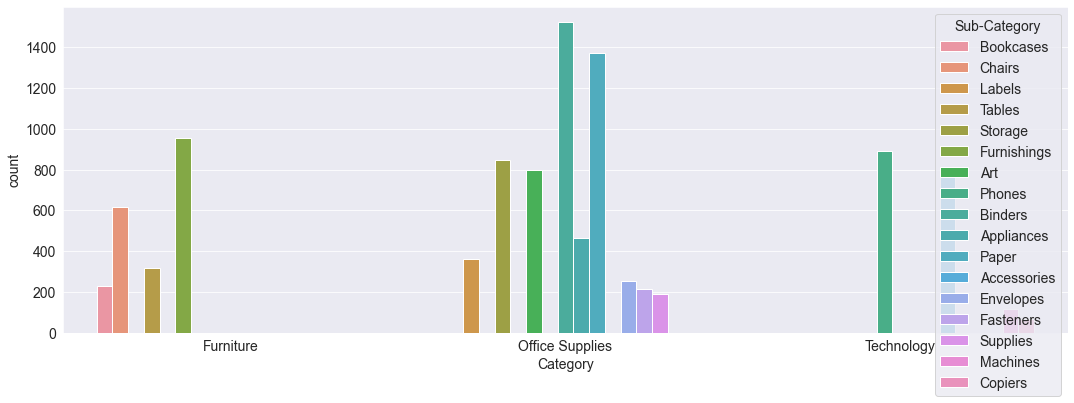

In [23]:
plt.figure(figsize=(18,6))

sns.countplot(x=df['Category'],hue=df['Sub-Category'])

Among the three categories,Chairs and furnishings are the most in demand among Furniture,Binders and Papers among office supplies and Phones and accessories among Technology.

<AxesSubplot:xlabel='Sub-Category', ylabel='count'>

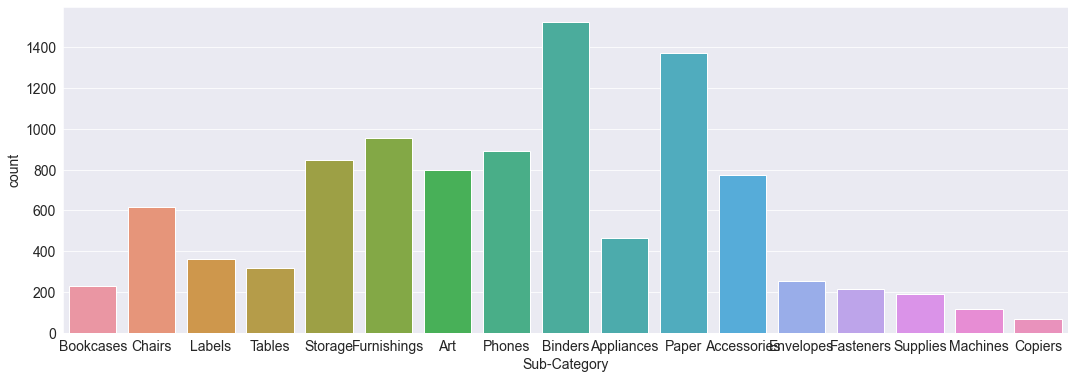

In [24]:
plt.figure(figsize=(18,6))
sns.countplot(x=df['Sub-Category'])

The binders and Papers are the most in demand and dominate among subcategories.

<AxesSubplot:xlabel='Ship Mode', ylabel='Sales'>

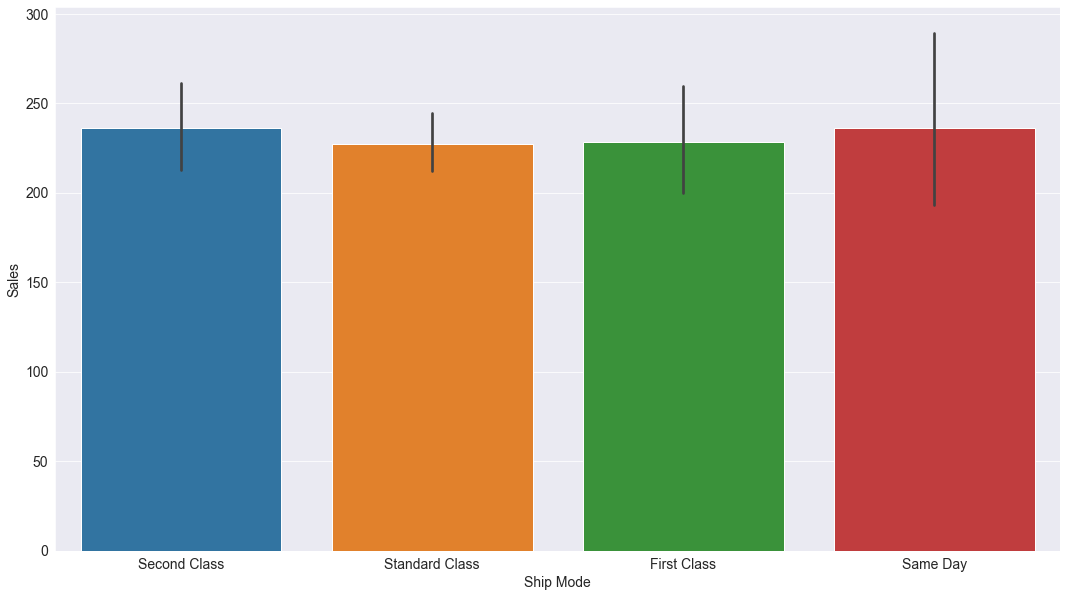

In [25]:
plt.figure(figsize=(18,10))
sns.barplot(x='Ship Mode',y='Sales',data =new_df)


All the shipping modes account for almost same amount of sales.

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

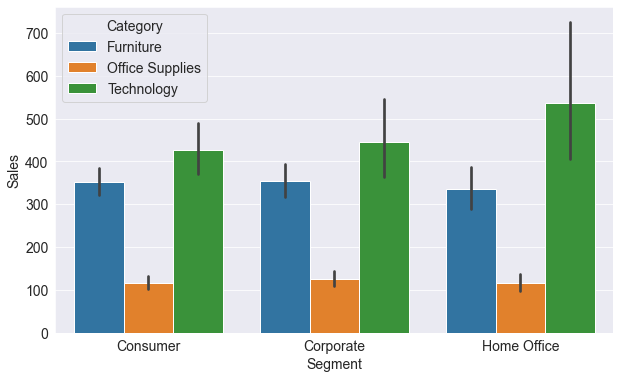

In [26]:
sns.barplot(x='Segment',y='Sales',hue='Category',data =new_df)


All the 3 segments have almost the same amount of sales with most of their sales from tecghnology and furniture category.

<AxesSubplot:xlabel='Region', ylabel='Sales'>

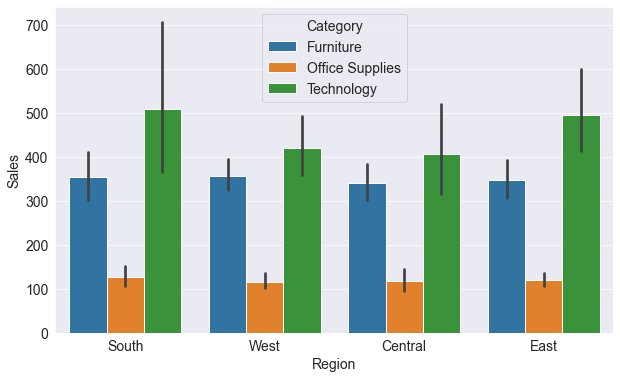

In [27]:
sns.barplot(x='Region',y='Sales',hue='Category',data =new_df)


All the 4 regions have almost the same amount of sales with most of their sales from Furniture and Technology Category. 

<AxesSubplot:xlabel='Category', ylabel='Sales'>

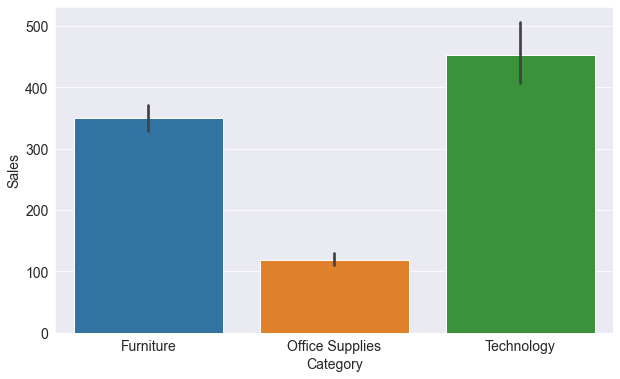

In [28]:
sns.barplot(x='Category',y='Sales',data =new_df)


<AxesSubplot:xlabel='Region', ylabel='Sales'>

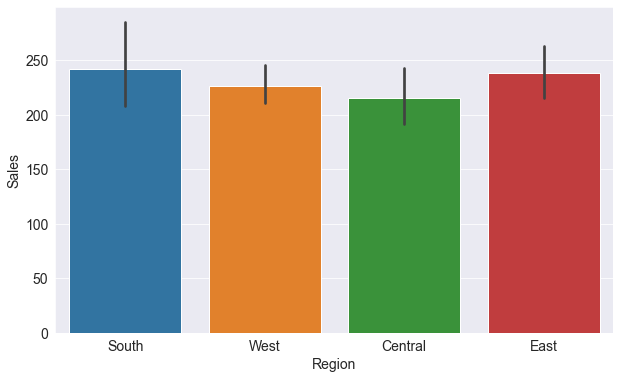

In [29]:
sns.barplot(x='Region',y='Sales',data =new_df)


The maximum sales comes from the technology and furniture category which can also be seen from the previous charts on different other columns. 

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

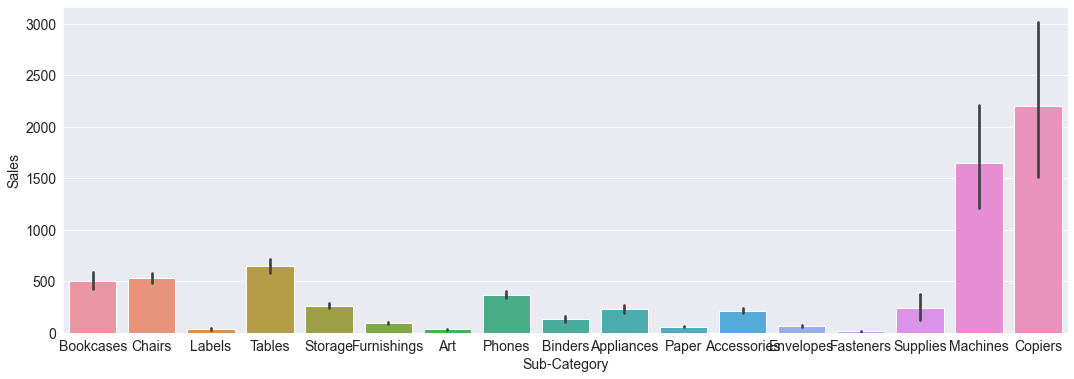

In [30]:
plt.figure(figsize=(18,6))
sns.barplot(x='Sub-Category',y='Sales',data =new_df)


THe maximum sales come from Machines and Copiers Sub-category.Then Tables,BookCases and Chairs,phones ,storage and appliances also has a descent amount of sales as compared to the other remaining categories but comparitively a lot lower than Machines and copiers.

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

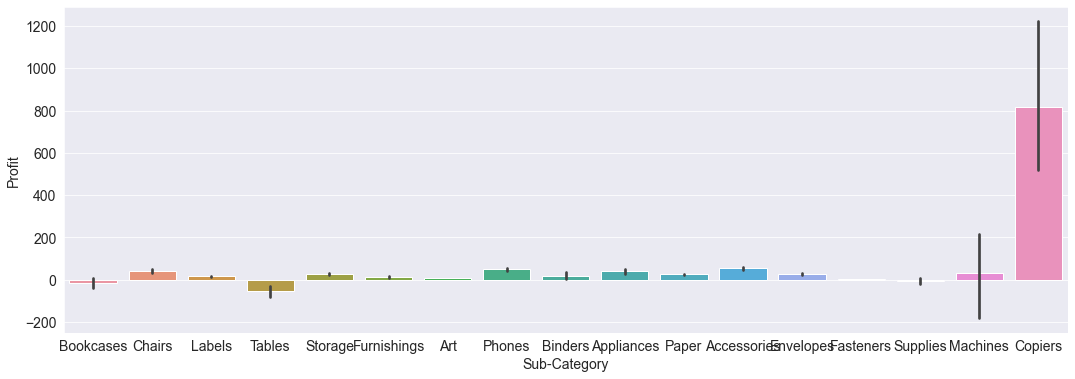

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(x='Sub-Category',y='Profit',data =new_df)


It seems that the main amount of profit comes from the Copiers as compared other csub-categories.Also we can see that some of the categories also acoount for losses.

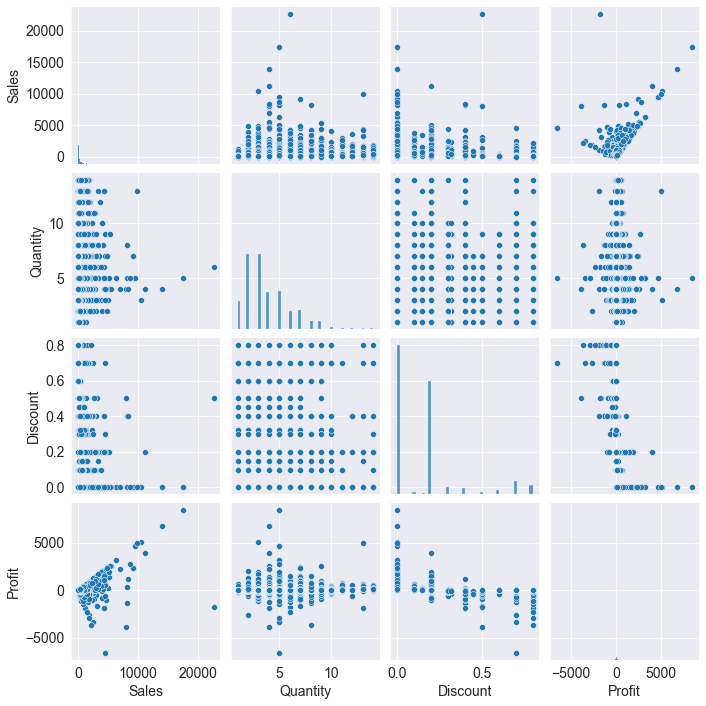

In [32]:
sns.pairplot(data=new_df)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

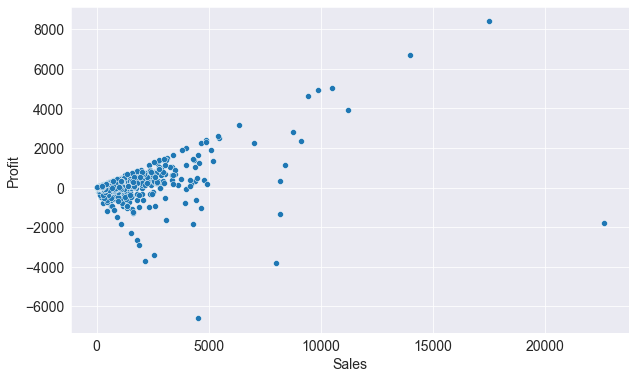

In [33]:
sns.scatterplot(x='Sales',y='Profit',data=new_df)

We can see that there is somewhat a linear relation between the sales and profit but there are a significant number of points where there is loss for products in the range of below 5000.Also there are certain outliers where the product caused a loss even on high price which might be due to the fact that those products were not in demand and were sold at a lower price to somehow finish the stock.

<AxesSubplot:xlabel='Quantity', ylabel='Profit'>

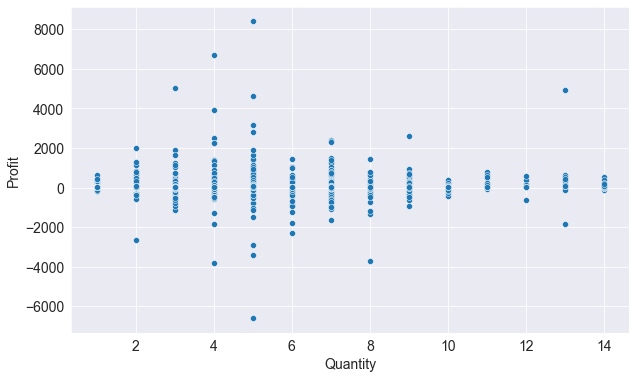

In [34]:
sns.scatterplot(x='Quantity',y='Profit',data=new_df)

We can see that the quantity of the product between 2-10 has a descent amount of losses as compared to profit but still the amount of profit exceeds than the loss which compensates for the loss in the overall scenario.

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

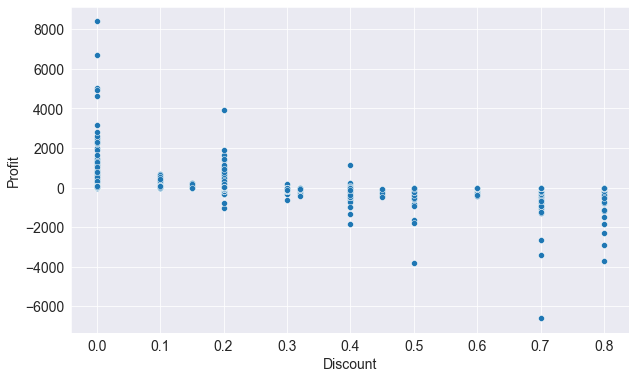

In [35]:
sns.scatterplot(x='Discount',y='Profit',data=new_df)

We can observe that as the discount increases the number of products sold in loss increases which is quite understandable.

## Summary

Hence for the store to increase its profit it should focus more on the Furniture and Technology as the major amount of sales comes from those categories.Also the maximum sales comes from the south and east region although there is not much difference in sales among all the regions so the store may focus more on the south and east region.Also the store needs to keep a check on the discount they are giving because it leads to loss although the sales is high for those products.